<a href="https://colab.research.google.com/github/VathareVinayak/IML-Practicals/blob/main/IML_Practical_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [22]:
test = pd.read_csv("/content/california_housing_test.csv")
train = pd.read_csv("/content/california_housing_test.csv")

Data Visualization

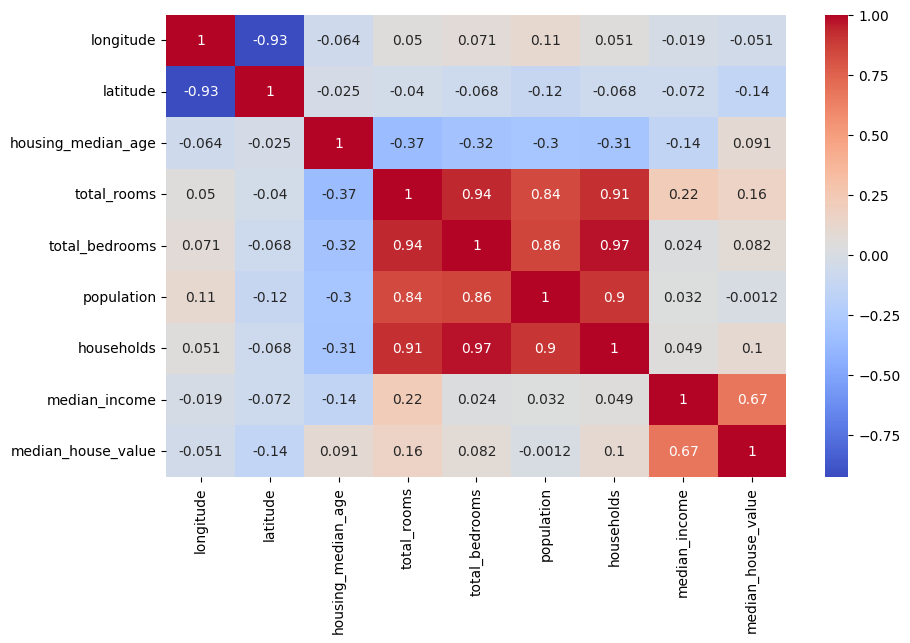

In [23]:
#Visuaising our data using Seaborn Libraryplt.figure()
plt.figure(figsize=(10, 6))
sns.heatmap(train.corr(), cmap='coolwarm', annot=True)
plt.show()


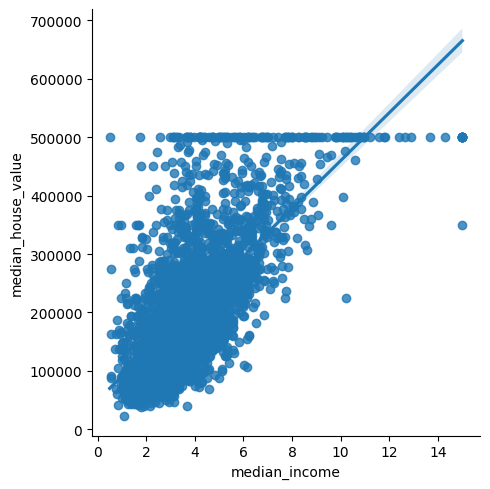

In [24]:
# Scatter plots for visualization
sns.lmplot(x='median_income', y='median_house_value', data=train)
plt.show()


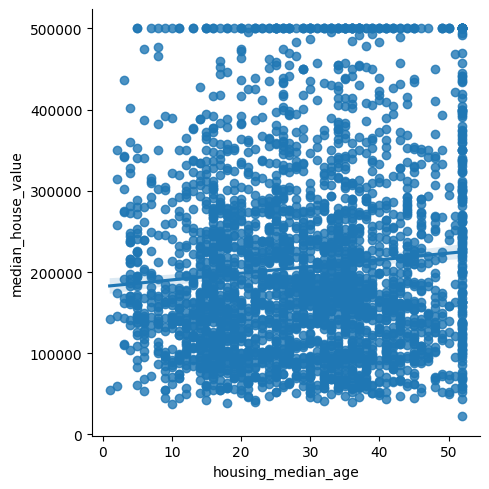

In [25]:
sns.lmplot(x='housing_median_age', y='median_house_value', data=train)
plt.show()

In [28]:
# Selecting relevant features and handling missing values
data = train[['total_rooms', 'total_bedrooms', 'housing_median_age', 'median_income', 'population', 'households']]
data.head(4)

,total_rooms,total_bedrooms,housing_median_age,median_income,population,households
0,3885.0,661.0,27.0,6.6085,1537.0,606.0
1,1510.0,310.0,43.0,3.5990,809.0,277.0
2,3589.0,507.0,27.0,5.7934,1484.0,495.0
3,67.0,15.0,28.0,6.1359,49.0,11.0


In [31]:
data.isnull().sum()

,0
total_rooms,0
total_bedrooms,0
housing_median_age,0
median_income,0
population,0
households,0


In [32]:
# Checking for missing values and filling them
data['total_rooms'] = data['total_rooms'].fillna(data['total_rooms'].mean())
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())


<ipython-input-32-05d594ea15bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_rooms'] = data['total_rooms'].fillna(data['total_rooms'].mean())
<ipython-input-32-05d594ea15bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())


In [33]:
# Separating features and target variable
X = data[['total_rooms', 'total_bedrooms', 'housing_median_age', 'median_income', 'population', 'households']]
y = train['median_house_value']


In [34]:
# Splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [35]:
# Fitting the model on training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [36]:
# Calculating the Intercept and Coefficients
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)

Intercept: -38291.75703812673
Coefficients: [-2.04937038e+01  1.12765846e+02  1.82970510e+03  4.65596501e+04
 -3.38976356e+01  1.13637362e+02]


In [37]:
# Making predictions
predictions = regressor.predict(X_test)


In [38]:
# Calculate and print MSE and RMSE of the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('MSE:', mse)
print('RMSE:', rmse)

MSE: 5727016088.761891
RMSE: 75677.05126894078
